In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("emi_prediction_dataset.csv")

C:\Users\offic\AppData\Local\Temp\ipykernel_18996\335177974.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("emi_prediction_dataset.csv")


In [3]:
df.head()

,age,gender,marital_status,education,monthly_salary,employment_type,years_of_employment,company_type,house_type,monthly_rent,...,existing_loans,current_emi_amount,credit_score,bank_balance,emergency_fund,emi_scenario,requested_amount,requested_tenure,emi_eligibility,max_monthly_emi
0,38.0,Female,Married,Professional,82600.0,Private,0.9,Mid-size,Rented,20000.0,...,Yes,23700.0,660.0,303200.0,70200.0,Personal Loan EMI,850000.0,15,Not_Eligible,500.0
1,38.0,Female,Married,Graduate,21500.0,Private,7.0,MNC,Family,0.0,...,Yes,4100.0,714.0,92500.0,26900.0,E-commerce Shopping EMI,128000.0,19,Not_Eligible,700.0
2,38.0,Male,Married,Professional,86100.0,Private,5.8,Startup,Own,0.0,...,No,0.0,650.0,672100.0,324200.0,Education EMI,306000.0,16,Eligible,27775.0
3,58.0,Female,Married,High School,66800.0,Private,2.2,Mid-size,Own,0.0,...,No,0.0,685.0,440900.0,178100.0,Vehicle EMI,304000.0,83,Eligible,16170.0
4,48.0,Female,Married,Professional,57300.0,Private,3.4,Mid-size,Family,0.0,...,No,0.0,770.0,97300.0,28200.0,Home Appliances EMI,252000.0,7,Not_Eligible,500.0


In [4]:
df.shape

(404800, 27)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404800 entries, 0 to 404799
Data columns (total 27 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   age                     404800 non-null  object 
 1   gender                  404800 non-null  object 
 2   marital_status          404800 non-null  object 
 3   education               402396 non-null  object 
 4   monthly_salary          404800 non-null  object 
 5   employment_type         404800 non-null  object 
 6   years_of_employment     404800 non-null  float64
 7   company_type            404800 non-null  object 
 8   house_type              404800 non-null  object 
 9   monthly_rent            402374 non-null  float64
 10  family_size             404800 non-null  int64  
 11  dependents              404800 non-null  int64  
 12  school_fees             404800 non-null  float64
 13  college_fees            404800 non-null  float64
 14  travel_expenses     

In [6]:
missing_value=df.isna().sum()
print(missing_value)

age                          0
gender                       0
marital_status               0
education                 2404
monthly_salary               0
employment_type              0
years_of_employment          0
company_type                 0
house_type                   0
monthly_rent              2426
family_size                  0
dependents                   0
school_fees                  0
college_fees                 0
travel_expenses              0
groceries_utilities          0
other_monthly_expenses       0
existing_loans               0
current_emi_amount           0
credit_score              2420
bank_balance              2426
emergency_fund            2351
emi_scenario                 0
requested_amount             0
requested_tenure             0
emi_eligibility              0
max_monthly_emi              0
dtype: int64


In [7]:
missing_value=df.isnull().sum()
print(missing_value[missing_value>0])

print(f"Total missing values: {df.isnull().sum().sum()}")

print(f"Percentage of missing data: {df.isnull().sum().sum() / (df.shape[0] * df.shape[1]) * 100:.2f}%")


education         2404
monthly_rent      2426
credit_score      2420
bank_balance      2426
emergency_fund    2351
dtype: int64
Total missing values: 12027
Percentage of missing data: 0.11%


In [8]:
df["education"].unique()

array(['Professional', 'Graduate', 'High School', 'Post Graduate', nan],
      dtype=object)

In [10]:

df['education']=df['education'].fillna(df['education'].mode()[0])


In [11]:
df['education'].isna().sum()

np.int64(0)

In [12]:
df["monthly_rent"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 404800 entries, 0 to 404799
Series name: monthly_rent
Non-Null Count   Dtype  
--------------   -----  
402374 non-null  float64
dtypes: float64(1)
memory usage: 3.1 MB


In [13]:
df['bank_balance'] = df['bank_balance'].str.replace(',', '')  
df['bank_balance'] = df['bank_balance'].str.replace(r'\.0$', '', regex=True)  
df['bank_balance'] = pd.to_numeric(df['bank_balance'], errors='coerce')


In [14]:
df["bank_balance"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 404800 entries, 0 to 404799
Series name: bank_balance
Non-Null Count   Dtype  
--------------   -----  
402353 non-null  float64
dtypes: float64(1)
memory usage: 3.1 MB


In [15]:
df["bank_balance"].isna().sum()

np.int64(2447)

In [16]:
#filling by imputer method
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import BayesianRidge

cols=["monthly_rent","credit_score","bank_balance","emergency_fund"]

imputer=IterativeImputer(estimator=BayesianRidge(),max_iter=10,random_state=0)

df[cols] = imputer.fit_transform(df[cols])




c:\Users\offic\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\impute\_iterative.py:895: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [17]:
missing_value=df.isna().sum()
print(missing_value)

age                       0
gender                    0
marital_status            0
education                 0
monthly_salary            0
employment_type           0
years_of_employment       0
company_type              0
house_type                0
monthly_rent              0
family_size               0
dependents                0
school_fees               0
college_fees              0
travel_expenses           0
groceries_utilities       0
other_monthly_expenses    0
existing_loans            0
current_emi_amount        0
credit_score              0
bank_balance              0
emergency_fund            0
emi_scenario              0
requested_amount          0
requested_tenure          0
emi_eligibility           0
max_monthly_emi           0
dtype: int64


In [21]:
df["age"].unique()

<IntegerArray>
[38, 58, 48, 32, 27, 47, 37, 31, 59, 49, 33, 26, 39, 57, 28]
Length: 15, dtype: Int64

In [18]:
df['age'] = df['age'].astype(str).replace('nan', np.nan)
df['age'] = df['age'].str.replace(r'\.0$', '', regex=True)





In [20]:
df['age'] = pd.to_numeric(df['age'], errors='coerce').astype('Int64')


In [22]:
df["monthly_salary"].isna().sum()

np.int64(0)

In [23]:
df["monthly_salary"]=df["monthly_salary"].astype(str).replace('nan', np.nan)

In [24]:
df["monthly_salary"]=df["monthly_salary"].str.replace(r'\.0$', '', regex=True)

In [25]:
df["monthly_salary"]=pd.to_numeric(df["monthly_salary"],errors="coerce")

In [26]:
df["monthly_salary"]=df["monthly_salary"].fillna(df["monthly_salary"].median())

In [27]:
df["monthly_salary"].isna().sum()

np.int64(0)

In [28]:
df["existing_loans"].unique()

array(['Yes', 'No'], dtype=object)

In [29]:
loan={
    'Yes': 1,
    'No': 0 
}

In [30]:
df["existing_loans"]=df["existing_loans"].replace(loan).astype("Int64")

C:\Users\offic\AppData\Local\Temp\ipykernel_18996\1778480050.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["existing_loans"]=df["existing_loans"].replace(loan).astype("Int64")


In [31]:
df["existing_loans"].unique()

<IntegerArray>
[1, 0]
Length: 2, dtype: Int64

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404800 entries, 0 to 404799
Data columns (total 27 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   age                     404800 non-null  Int64  
 1   gender                  404800 non-null  object 
 2   marital_status          404800 non-null  object 
 3   education               404800 non-null  object 
 4   monthly_salary          404800 non-null  float64
 5   employment_type         404800 non-null  object 
 6   years_of_employment     404800 non-null  float64
 7   company_type            404800 non-null  object 
 8   house_type              404800 non-null  object 
 9   monthly_rent            404800 non-null  float64
 10  family_size             404800 non-null  int64  
 11  dependents              404800 non-null  int64  
 12  school_fees             404800 non-null  float64
 13  college_fees            404800 non-null  float64
 14  travel_expenses     

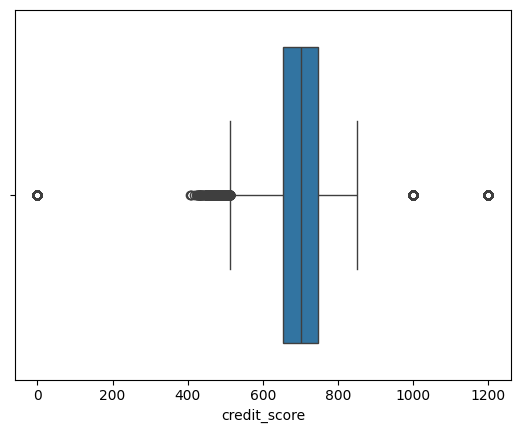

In [33]:
#checking the outliers
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=df["credit_score"])
plt.show()

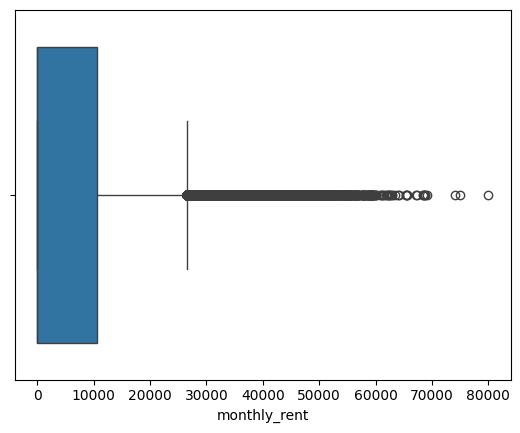

In [34]:
#checking the outliers
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=df["monthly_rent"])
plt.show()

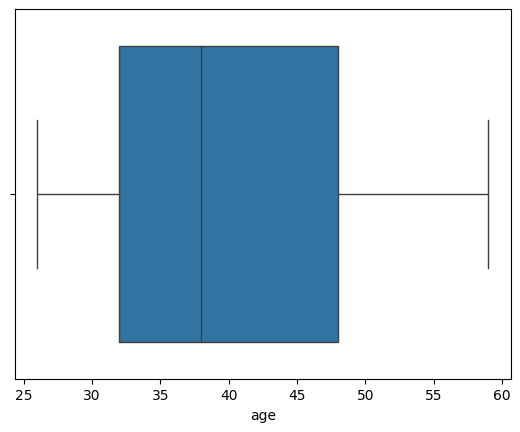

In [35]:
#checking the outliers
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=df["age"])
plt.show()

# -------------- EDA -----------------

C:\Users\offic\AppData\Local\Temp\ipykernel_18996\147749411.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="emi_eligibility", data=df, palette="Set2")


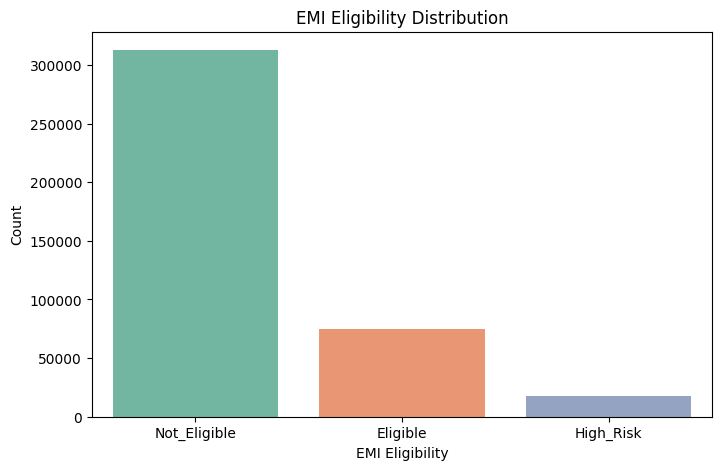

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.countplot(x="emi_eligibility", data=df, palette="Set2")  
plt.title("EMI Eligibility Distribution")
plt.xlabel("EMI Eligibility")
plt.ylabel("Count")
plt.show()


C:\Users\offic\AppData\Local\Temp\ipykernel_18996\941867315.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="employment_type", data=df, palette="viridis")


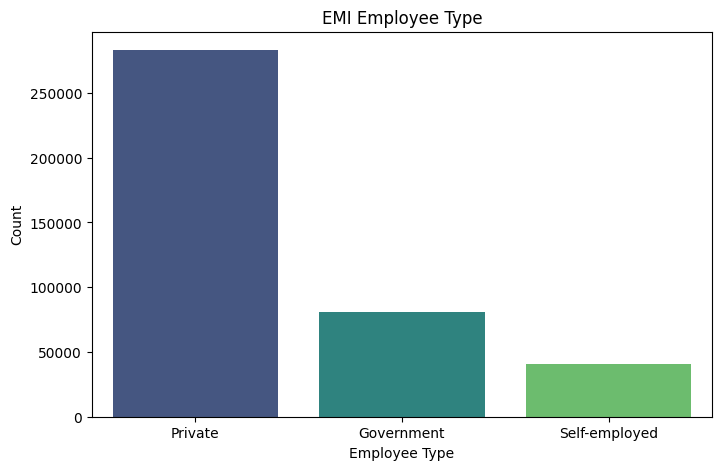

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.countplot(x="employment_type", data=df, palette="viridis")  
plt.title("EMI Employee Type")
plt.xlabel("Employee Type")
plt.ylabel("Count")
plt.show()


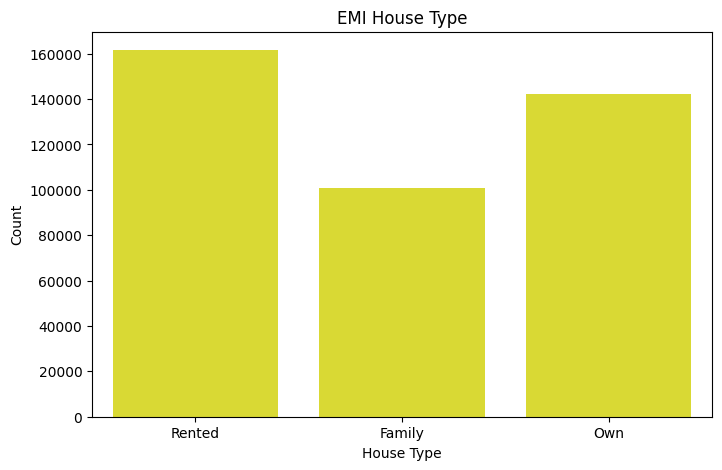

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.countplot(x="house_type", data=df, color="#f5f518")  
plt.title("EMI House Type")
plt.xlabel("House Type")
plt.ylabel("Count")
plt.show()

<Axes: xlabel='emi_eligibility', ylabel='monthly_salary'>

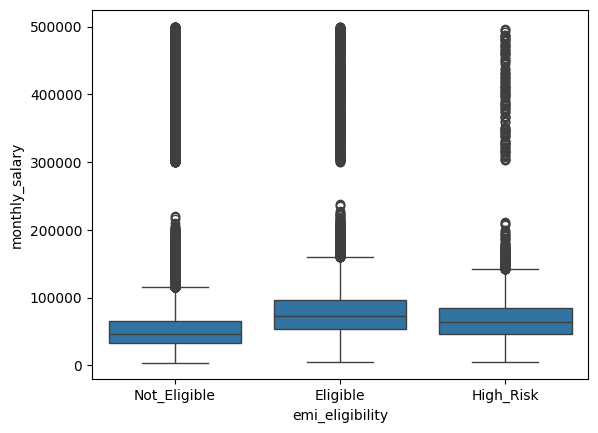

In [39]:
sns.boxplot(x=df["emi_eligibility"] , y=df["monthly_salary"])

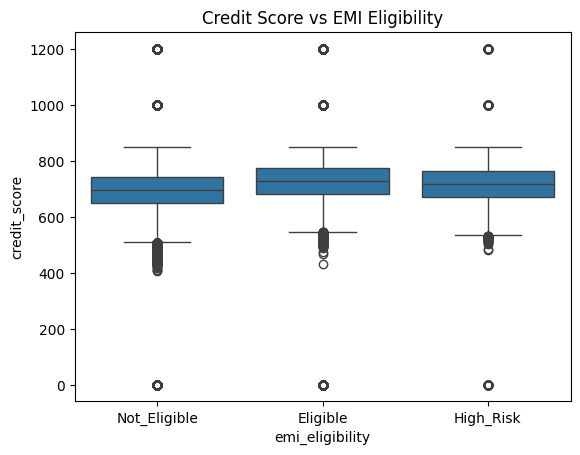

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='emi_eligibility', y='credit_score', data=df)
plt.title("Credit Score vs EMI Eligibility")
plt.show()


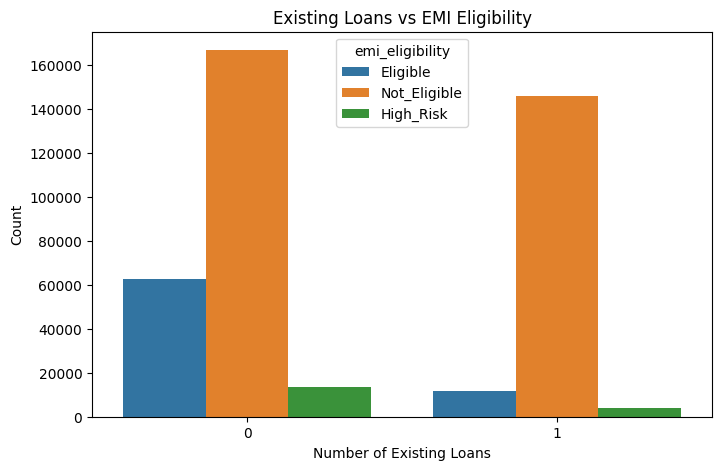

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.countplot(x='existing_loans', hue='emi_eligibility', data=df)
plt.title("Existing Loans vs EMI Eligibility")
plt.xlabel("Number of Existing Loans")
plt.ylabel("Count")
plt.show()


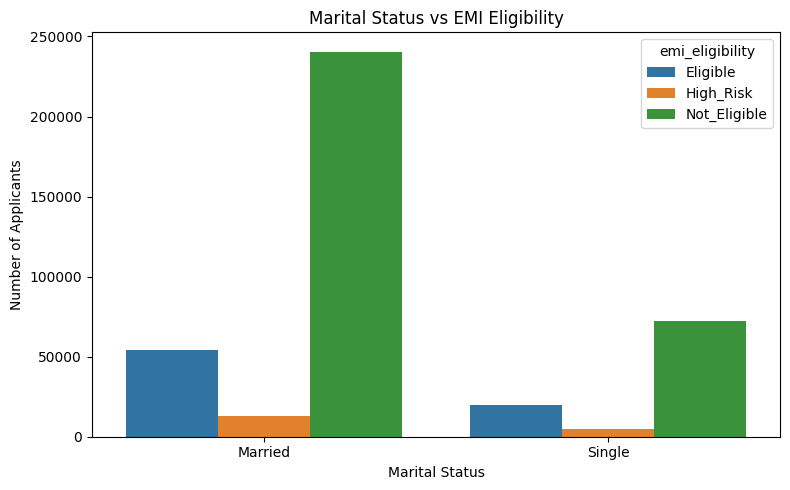

In [42]:
order_freq = df.groupby(['marital_status', 'emi_eligibility']).size().reset_index(name='count')

plt.figure(figsize=(8,5))
sns.barplot(data=order_freq, x='marital_status', y='count', hue='emi_eligibility')

plt.title("Marital Status vs EMI Eligibility")
plt.xlabel("Marital Status")
plt.ylabel("Number of Applicants")
plt.tight_layout()
plt.show()


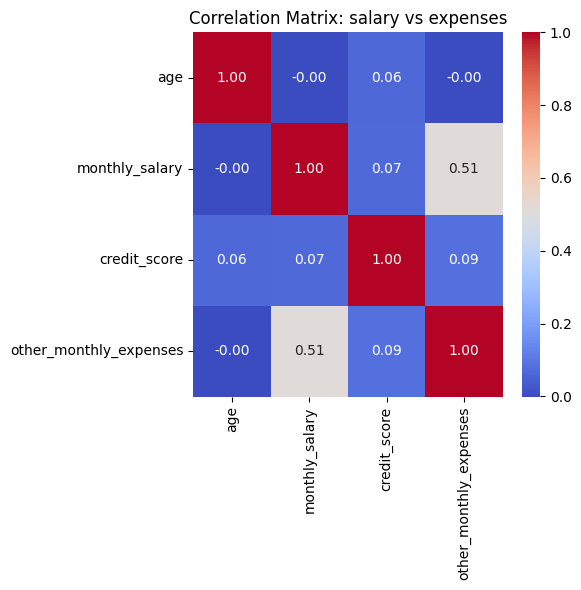

In [43]:
corr=df[["age","monthly_salary","credit_score","other_monthly_expenses"]].corr()

plt.figure(figsize=(6,6))
sns.heatmap(corr,annot=True,cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix: salary vs expenses")
plt.tight_layout()
plt.show()

In [44]:
income_expense_cols = [
    'monthly_salary',
    'groceries_utilities',
    'school_fees',
    'travel_expenses',
    'other_monthly_expenses'
]

df_income_expense = df[income_expense_cols]


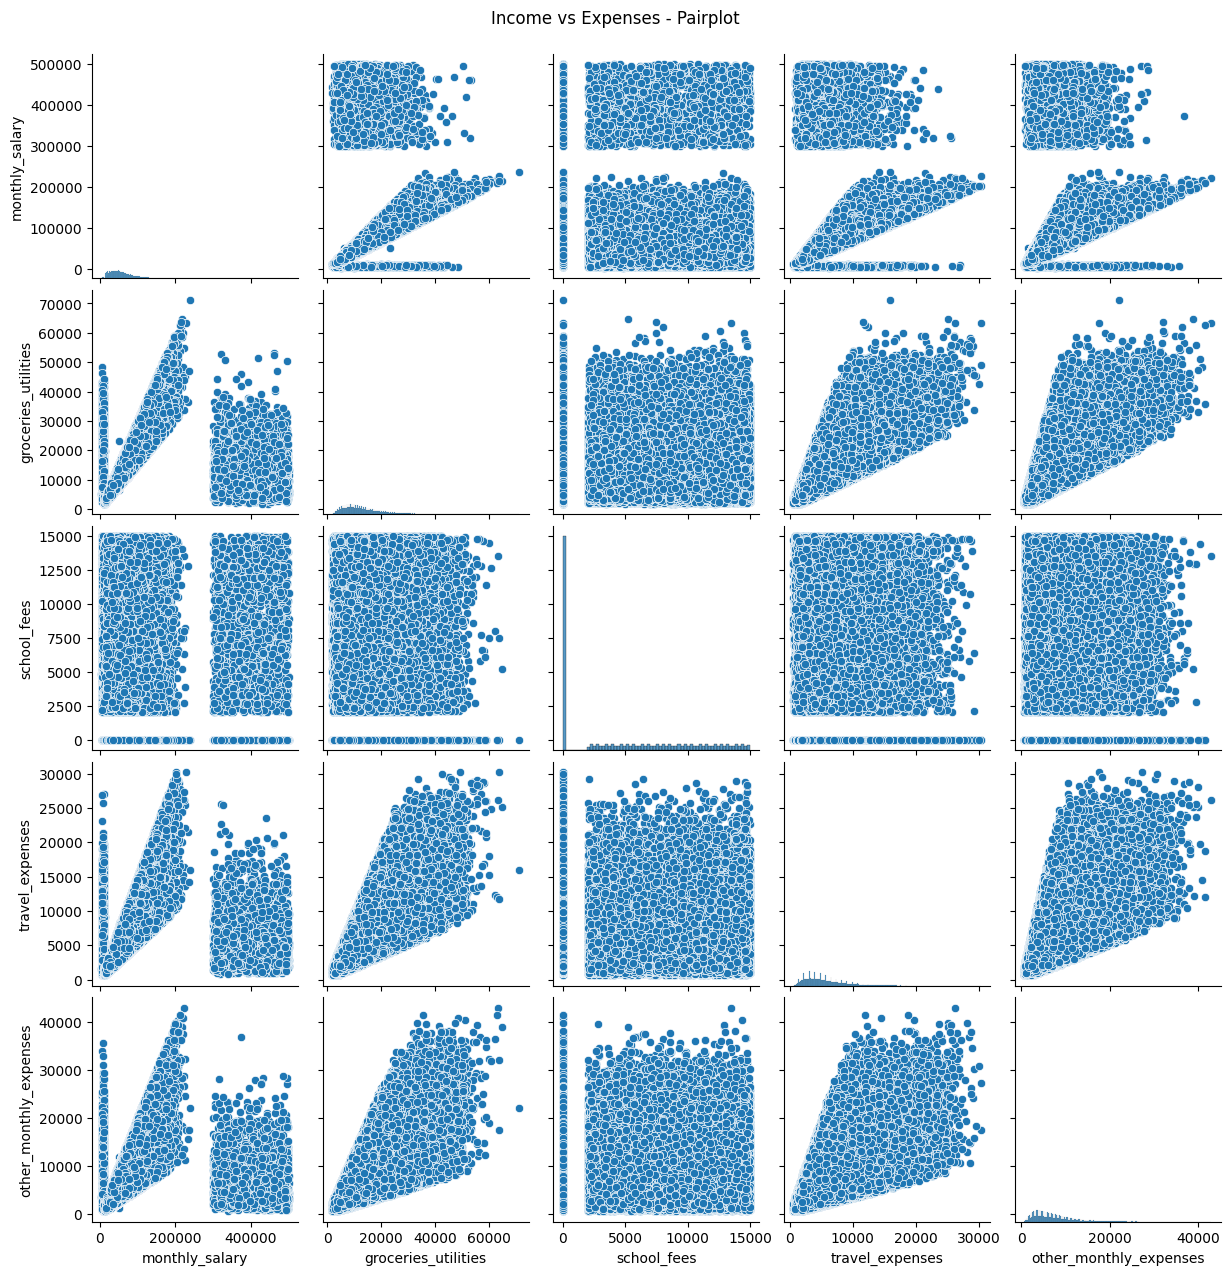

In [45]:

sns.pairplot(df_income_expense)
plt.suptitle("Income vs Expenses - Pairplot", y=1.02)
plt.show()


In [46]:
df['expense_income_ratio'] = (
    df['groceries_utilities'] +
    df['school_fees'] +
    df['travel_expenses'] +
    df['other_monthly_expenses']
) / df['monthly_salary']


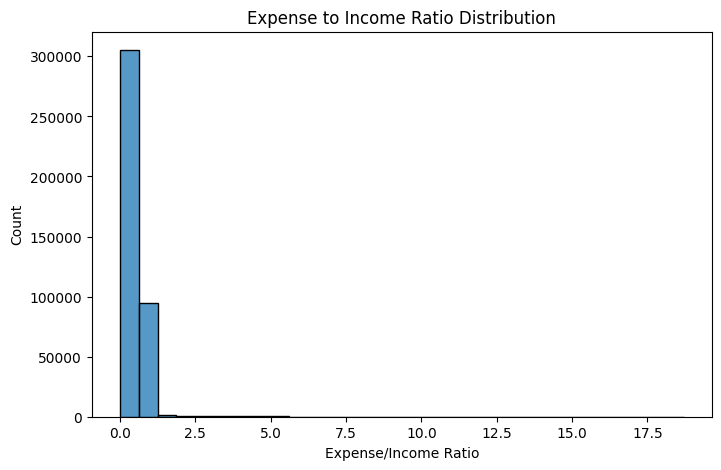

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.histplot(df['expense_income_ratio'], bins=30)
plt.title("Expense to Income Ratio Distribution")
plt.xlabel("Expense/Income Ratio")
plt.ylabel("Count")
plt.show()


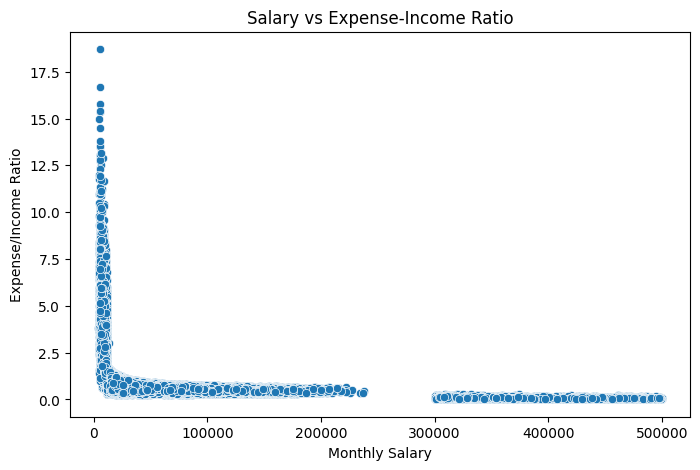

In [48]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='monthly_salary', y='expense_income_ratio', data=df)
plt.title("Salary vs Expense-Income Ratio")
plt.xlabel("Monthly Salary")
plt.ylabel("Expense/Income Ratio")
plt.show()


In [49]:
df["total_expense"]= df['groceries_utilities'] + df['school_fees'] +df['travel_expenses'] +df['other_monthly_expenses']

In [50]:
#saving ratio
df["saving_ratio"]=(df["monthly_salary"] - df["total_expense"]) / df["monthly_salary"]

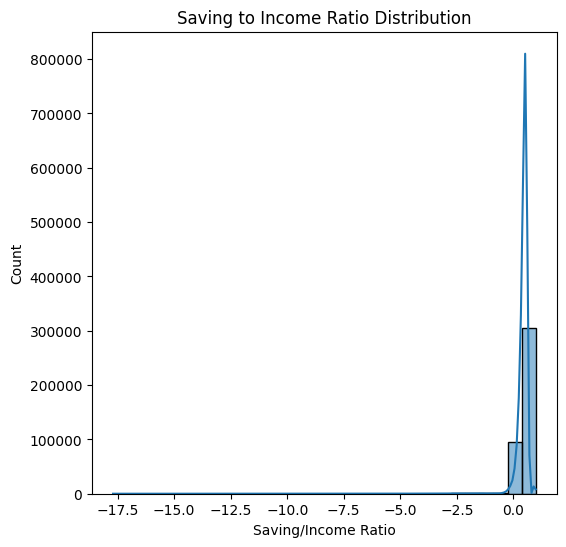

In [51]:
plt.figure(figsize=(6,6))
sns.histplot(df['saving_ratio'], bins=30,kde=True)
plt.title("Saving to Income Ratio Distribution")
plt.xlabel("Saving/Income Ratio")
plt.ylabel("Count")
plt.show()


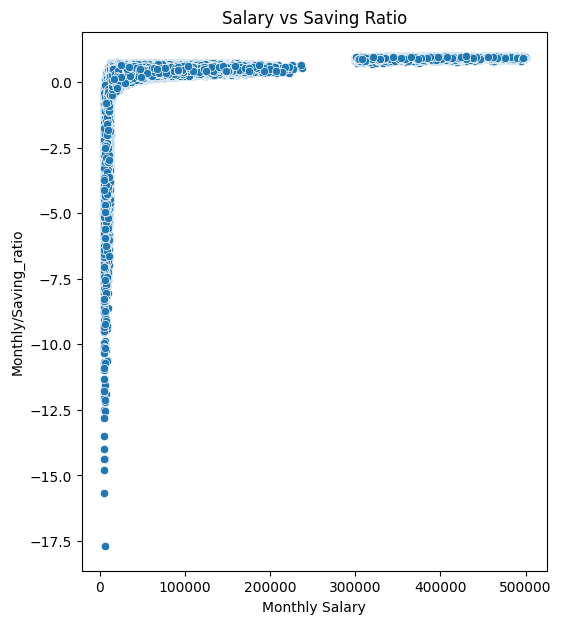

In [52]:
plt.figure(figsize=(6,7))
sns.scatterplot(x='monthly_salary', y='saving_ratio', data=df)
plt.title("Salary vs Saving Ratio")
plt.xlabel("Monthly Salary")
plt.ylabel("Monthly/Saving_ratio")
plt.show()

In [53]:
df["emi_ratio"]=(df["current_emi_amount"]/ df["monthly_salary"])


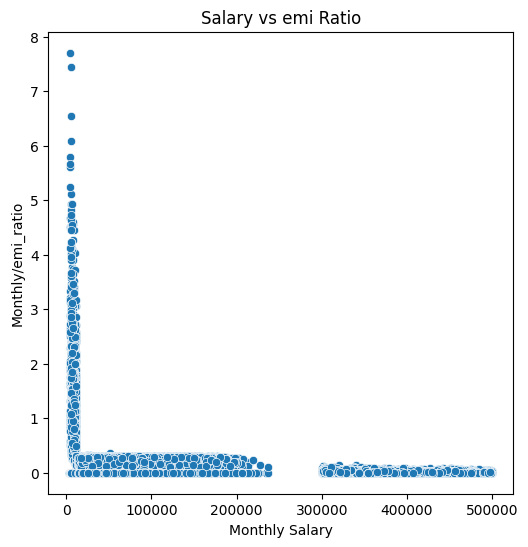

In [54]:
plt.figure(figsize=(6,6))
sns.scatterplot(x='monthly_salary', y='emi_ratio', data=df)
plt.title("Salary vs emi Ratio")
plt.xlabel("Monthly Salary")
plt.ylabel("Monthly/emi_ratio")
plt.show()

In [55]:
#financially stablility index
df['financial_stability_index'] = df['bank_balance'] + df['emergency_fund']


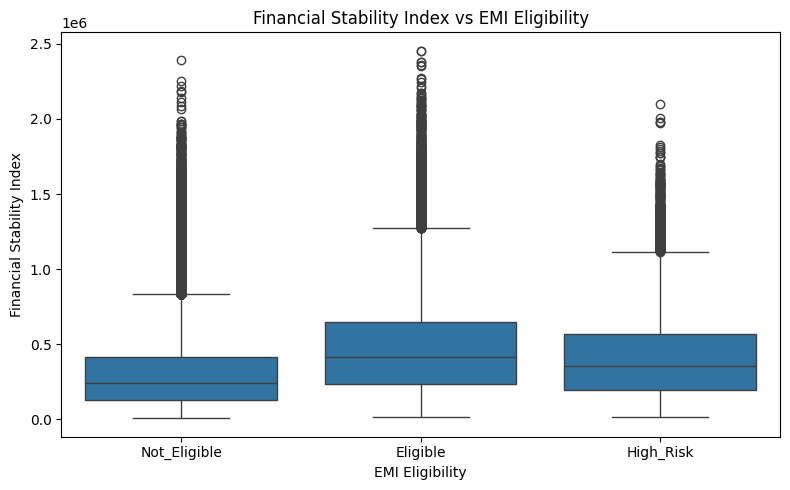

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.boxplot(x='emi_eligibility', y='financial_stability_index', data=df)
plt.title("Financial Stability Index vs EMI Eligibility")
plt.xlabel("EMI Eligibility")
plt.ylabel("Financial Stability Index")
plt.tight_layout()
plt.show()


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404800 entries, 0 to 404799
Data columns (total 32 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   age                        404800 non-null  Int64  
 1   gender                     404800 non-null  object 
 2   marital_status             404800 non-null  object 
 3   education                  404800 non-null  object 
 4   monthly_salary             404800 non-null  float64
 5   employment_type            404800 non-null  object 
 6   years_of_employment        404800 non-null  float64
 7   company_type               404800 non-null  object 
 8   house_type                 404800 non-null  object 
 9   monthly_rent               404800 non-null  float64
 10  family_size                404800 non-null  int64  
 11  dependents                 404800 non-null  int64  
 12  school_fees                404800 non-null  float64
 13  college_fees               40

In [58]:
df["emi_eligibility"].unique()

array(['Not_Eligible', 'Eligible', 'High_Risk'], dtype=object)

In [60]:
# Encode  0/1/2
# 'Not_Eligible' → 0, 'Eligible' → 1, 'High_Risk' → 2
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['emi_eligibility'] = le.fit_transform(df['emi_eligibility'])
for i, label in enumerate(le.classes_):
    print(f"{i} → {label}")

print(le.classes_)
print(df['emi_eligibility'].unique())  # e.g., [0,1,2]


0 → 0
1 → 1
2 → 2
[0 1 2]
[2 0 1]


In [65]:
df["emi_eligibility"].unique()

array([2, 0, 1])

In [66]:
# Dependents ratio
df['dependents_ratio'] = df['dependents'] / df['family_size']


In [67]:
# Affordability ratio
df['affordability_ratio'] = df['bank_balance'] / df['monthly_salary']

In [68]:
#categorical encoding

df=pd.get_dummies(df,columns=["gender","marital_status","education","employment_type","company_type","house_type","emi_scenario"])

In [69]:
#scaling the features of all numerical values
from sklearn.preprocessing import StandardScaler
num_cols = ['age','monthly_salary','years_of_employment','credit_score','bank_balance','emergency_fund','requested_amount','requested_tenure','emi_ratio','affordability_ratio','dependents_ratio',"saving_ratio","expense_income_ratio"]
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404800 entries, 0 to 404799
Data columns (total 51 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   age                                   404800 non-null  float64
 1   monthly_salary                        404800 non-null  float64
 2   years_of_employment                   404800 non-null  float64
 3   monthly_rent                          404800 non-null  float64
 4   family_size                           404800 non-null  int64  
 5   dependents                            404800 non-null  int64  
 6   school_fees                           404800 non-null  float64
 7   college_fees                          404800 non-null  float64
 8   travel_expenses                       404800 non-null  float64
 9   groceries_utilities                   404800 non-null  float64
 10  other_monthly_expenses                404800 non-null  float64
 11  

# -------------------------------------------------------------------------

# logistic regression for classification

In [64]:
# doing train test split for regression and classification for logistic regression
from sklearn.model_selection import train_test_split

X = df.drop(columns=['emi_eligibility',"max_monthly_emi"])   
y = df['emi_eligibility']




In [65]:
X_train_cls,X_test_cls, y_train_cls, y_test_cls = train_test_split(X,y,test_size=0.2,random_state=42)

In [66]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

model=LogisticRegression(max_iter=1000)
model.fit(X_train_cls,y_train_cls)

c:\Users\offic\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [67]:
from sklearn.metrics import accuracy_score

In [68]:
y_pred_cls=model.predict(X_test_cls)
test_acc = accuracy_score(y_test_cls,y_pred_cls)
print(f"Test Accuracy : {test_acc}")


Test Accuracy : 0.8136981225296442


In [69]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

print("mean_squared_error:",mean_squared_error(y_test_cls,y_pred_cls))
print("mean_absolute_error:",mean_absolute_error(y_test_cls,y_pred_cls))

mean_squared_error: 0.618070652173913
mean_absolute_error: 0.3302248023715415


In [70]:
# precision, recall, F1- score , accuracy -> classification report

from sklearn.metrics import classification_report,confusion_matrix

print(classification_report(y_test_cls,y_pred_cls))

              precision    recall  f1-score   support

           0       0.63      0.41      0.49     14958
           1       0.00      0.00      0.00      3431
           2       0.84      0.96      0.89     62571

    accuracy                           0.81     80960
   macro avg       0.49      0.45      0.46     80960
weighted avg       0.76      0.81      0.78     80960



c:\Users\offic\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\offic\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\offic\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(ave

# Random class classifier

In [71]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report


In [72]:
rf_model = RandomForestClassifier(
    n_estimators=200,       
    max_depth=None,         
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42,
    n_jobs=-1               # cores for faster training
)

# Train
rf_model.fit(X_train_cls, y_train_cls)

,n_estimators,200
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [73]:
y_pred_rf_cls = rf_model.predict(X_test_cls)
test_acc_rf = accuracy_score(y_test_cls,y_pred_rf_cls)
print(f"Test Accuracy : {test_acc_rf}")

Test Accuracy : 0.9279520750988143


In [74]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

print("mean_squared_error:",mean_squared_error(y_test_cls,y_pred_rf_cls))
print("mean_absolute_error:",mean_absolute_error(y_test_cls,y_pred_rf_cls))

mean_squared_error: 0.16294466403162056
mean_absolute_error: 0.10234683794466404


In [75]:
from sklearn.metrics import classification_report

print(classification_report(y_test_cls,y_pred_rf_cls))

              precision    recall  f1-score   support

           0       0.90      0.87      0.88     14958
           1       1.00      0.01      0.03      3431
           2       0.93      0.99      0.96     62571

    accuracy                           0.93     80960
   macro avg       0.95      0.62      0.63     80960
weighted avg       0.93      0.93      0.91     80960



In [76]:
print(np.unique(y_test_cls))


[0 1 2]


In [77]:
from sklearn.metrics import roc_auc_score

y_pred_prob_rf = rf_model.predict_proba(X_test_cls)

auc_rf = roc_auc_score(
    y_test_cls, 
    y_pred_prob_rf, 
    multi_class='ovr', 
    average='macro'
)
print(f"AUC (multi-class): {auc_rf}")


AUC (multi-class): 0.9592678109664973


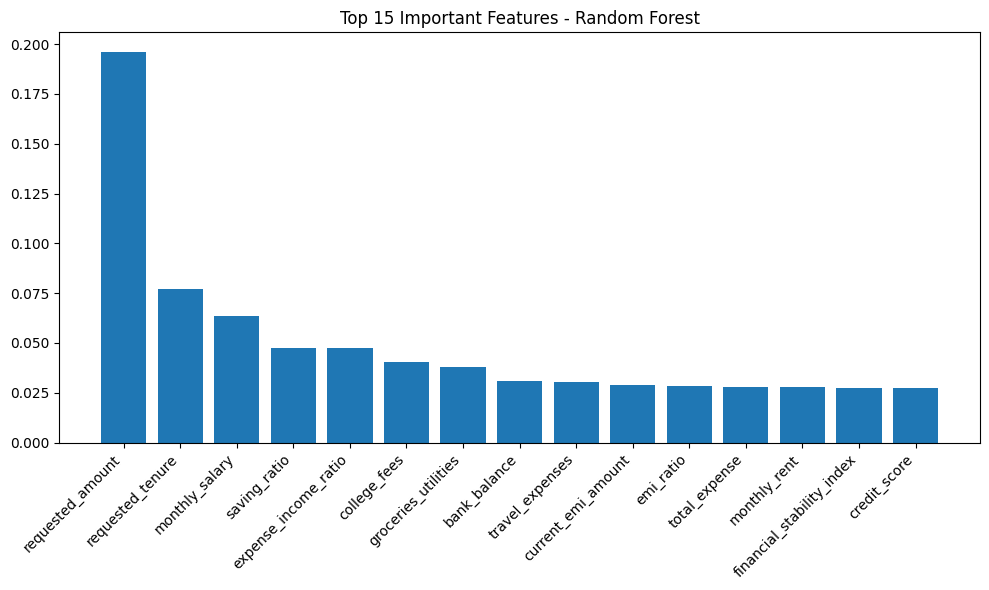

In [78]:
import matplotlib.pyplot as plt
import numpy as np

importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]
features = X.columns

plt.figure(figsize=(10,6))
plt.title("Top 15 Important Features - Random Forest")
plt.bar(range(15), importances[indices][:15])
plt.xticks(range(15), features[indices][:15], rotation=45, ha='right')
plt.tight_layout()
plt.show()


# xgboost


In [79]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report


In [80]:
xgb_model = XGBClassifier(
    objective='multi:softprob',   # Multi-class classification
    num_class=3,                  # Number of target classes
    eval_metric='mlogloss',       # Multi-class log loss
    use_label_encoder=False,
    n_estimators=300,
    max_depth=6,
    learning_rate=0.1,
    random_state=42
)

# Train
xgb_model.fit(X_train_cls, y_train_cls)

c:\Users\offic\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:199: UserWarning: [19:24:15] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


,objective,'multi:softprob'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'mlogloss'


In [81]:
y_pred_xgb_cls = xgb_model.predict(X_test_cls)
test_acc_xgb = accuracy_score(y_test_cls,y_pred_xgb_cls)
print(f"Test Accuracy : {test_acc_xgb}")

Test Accuracy : 0.958300395256917


In [82]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

print("mean_squared_error:",mean_squared_error(y_test_cls,y_pred_rf_cls))
print("mean_absolute_error:",mean_absolute_error(y_test_cls,y_pred_rf_cls))

print("------------------------------------")

from sklearn.metrics import classification_report

print(classification_report(y_test_cls,y_pred_xgb_cls))

mean_squared_error: 0.16294466403162056
mean_absolute_error: 0.10234683794466404
------------------------------------
              precision    recall  f1-score   support

           0       0.92      0.98      0.95     14958
           1       0.83      0.13      0.23      3431
           2       0.97      1.00      0.98     62571

    accuracy                           0.96     80960
   macro avg       0.91      0.70      0.72     80960
weighted avg       0.95      0.96      0.94     80960



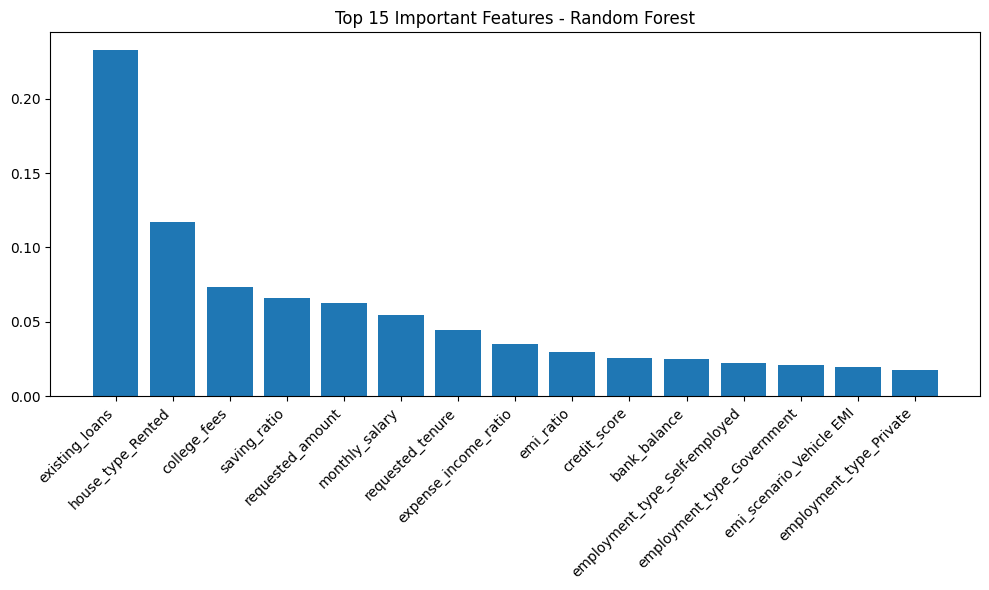

In [83]:
import matplotlib.pyplot as plt
import numpy as np

importances = xgb_model.feature_importances_
indices = np.argsort(importances)[::-1]
features = X.columns

plt.figure(figsize=(10,6))
plt.title("Top 15 Important Features - Random Forest")
plt.bar(range(15), importances[indices][:15])
plt.xticks(range(15), features[indices][:15], rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [84]:

print(f"Test Accuracy : {test_acc}")
print(f"Test Accuracy : {test_acc_rf}")
print(f"Test Accuracy : {test_acc_xgb}")

Test Accuracy : 0.8136981225296442
Test Accuracy : 0.9279520750988143
Test Accuracy : 0.958300395256917


# logistic regression for linear regression

In [85]:
from sklearn.model_selection import train_test_split

X_reg = df.drop(columns=['max_monthly_emi'])   
y_reg = df['max_monthly_emi']


In [86]:
X_train_reg,X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg,y_reg,test_size=0.2,random_state=42)

In [87]:
from sklearn.linear_model import LinearRegression

model_reg=LinearRegression()
model_reg.fit(X_train_reg,y_train_reg)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [88]:
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
#prediction
y_pred_reg = model_reg.predict(X_test_reg)

mse = mean_squared_error(y_test_reg, y_pred_reg)
r2 = r2_score(y_test_reg, y_pred_reg)
mae= mean_absolute_error(y_test_reg,y_pred_reg)
print("MSE:", mse)
print("Mae:", mae)
print("R2:", r2)


MSE: 14459489.212839788
Mae: 2718.9782923104954
R2: 0.7550751787996905


# Regression for random forest


In [89]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(
    n_estimators=200,
    max_depth=None,
    random_state=42,
    n_jobs=-1
)
rf_model.fit(X_train_reg, y_train_reg)

,n_estimators,200
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [90]:
y_pred_rf_reg = rf_model.predict(X_test_reg)

In [91]:
mse = mean_squared_error(y_test_reg, y_pred_rf_reg)
r2 = r2_score(y_test_reg, y_pred_rf_reg)
mae= mean_absolute_error(y_test_reg,y_pred_rf_reg)
print("MSE:", mse)
print("Mae:", mae)
print("R2:", r2)

MSE: 1098036.3155454255
Mae: 512.58849408041
R2: 0.9814007020374137


# xgboost regressor

In [92]:
from xgboost import XGBRegressor

xgb_model = XGBRegressor(
    objective='reg:squarederror',
    n_estimators=300,
    max_depth=6,
    learning_rate=0.1,
    random_state=42
)
xgb_model.fit(X_train_reg, y_train_reg)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [93]:
y_pred_xgb_reg = xgb_model.predict(X_test_reg)

In [94]:
mse = mean_squared_error(y_test_reg, y_pred_xgb_reg)
r2 = r2_score(y_test_reg, y_pred_xgb_reg)
mae= mean_absolute_error(y_test_reg,y_pred_xgb_reg)
print("MSE:", mse)
print("Mae:", mae)
print("R2:", r2)

MSE: 634984.0959470725
Mae: 483.6008937125413
R2: 0.9892442005470861


# ML Flow

In [2]:
! pip install mlflow


In [3]:
import mlflow
import mlflow.sklearn


In [4]:
mlflow.set_tracking_uri("http://127.0.0.1:5001")
mlflow.set_experiment("EMIPredict_Classification_Regression")



MlflowException: API request to http://127.0.0.1:5001/api/2.0/mlflow/experiments/get-by-name failed with exception HTTPConnectionPool(host='127.0.0.1', port=5001): Max retries exceeded with url: /api/2.0/mlflow/experiments/get-by-name?experiment_name=EMIPredict_Classification_Regression (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x000002354B27E690>: Failed to establish a new connection: [WinError 10061] No connection could be made because the target machine actively refused it'))

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression


models = [
    (
        "Logistic Regression",
        {"solver": "liblinear", "random_state": 42},
        LogisticRegression(),
        (X_train_cls, X_test_cls),
        (y_train_cls, y_test_cls)
    ),
    
    (
        "Random Forest",
        {"n_estimators": 200, "max_depth": 5, "random_state": 42, "n_jobs": -1},
        RandomForestClassifier(),
        (X_train_cls, X_test_cls),
        (y_train_cls, y_test_cls)
    ),

    (
        "XGBoost Classifier",
        {"n_estimators": 150, "max_depth": 6, "learning_rate": 0.1, "random_state": 42},
        XGBClassifier(),
        (X_train_cls, X_test_cls),
        (y_train_cls, y_test_cls)
    )
]



In [ ]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.metrics import f1_score


results = []

for model_name, params, model,train_set,test_set  in models:
    with mlflow.start_run(run_name=model_name):
        print(f"\n🚀 Training {model_name}...")
        
        X_train=train_set[0]
        X_test=train_set[1]
        y_train=test_set[0]
        y_test=test_set[1]
        
        #apply hyperparameter and train the model
        
        model.set_params(**params)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        #metrics
        acc = accuracy_score(y_test, y_pred)
        f1=f1_score(y_test,y_pred,average="weighted")
        print(f"✅ {model_name} Accuracy: {acc:.4f}")
    
        print(f"✅ {model_name} F1score: {f1}")
        print("📊 Classification Report:")
        
        print(classification_report(y_test, y_pred))
        
        
        mlflow.log_params(params)
        mlflow.log_metric("accuracy", acc)
        mlflow.log_metric("f1_score", f1)
        mlflow.sklearn.log_model(model, "model")
        
        results.append({
            "Model": model_name,
            "Accuracy": acc,
            "F1score": f1
        })


In [99]:
import numpy as np
unique, counts = np.unique(y_train_cls, return_counts=True)
print(dict(zip(unique, counts)))


{np.int64(0): np.int64(59486), np.int64(1): np.int64(14057), np.int64(2): np.int64(250297)}
